# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:

        print(f"City {city} not found. Skipping...")
        print(f"URL: {city_url}")
        print(f"Response: {city_weather}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | glace bay
Processing Record 2 of Set 1 | xifeng
Processing Record 3 of Set 1 | bomdila
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | olinda
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | loa janan
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | monte azul
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | lesnoy
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | papatowai
Processing Record 23 of Se

Processing Record 30 of Set 4 | port mathurin
Processing Record 31 of Set 4 | tura
Processing Record 32 of Set 4 | thompson
Processing Record 33 of Set 4 | el calafate
Processing Record 34 of Set 4 | slave lake
Processing Record 35 of Set 4 | porbandar
Processing Record 36 of Set 4 | calliope
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | kerikeri
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | gueltat zemmour
City gueltat zemmour not found. Skipping...
URL: https://api.openweathermap.org/data/2.5/weather?appid=aa962267ed306268f6847a46a33f6d4b&q=gueltat zemmour
Response: {'cod': '404', 'message': 'city not found'}
Processing Record 41 of Set 4 | nuuk
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | nova sintra
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | fort bragg
Processing Record 46 of Set 4 | suoyarvi
Processing Record 47 of Set 4 | muynoq
Processing Record 48 of Set 4 |

Processing Record 33 of Set 7 | tondano
Processing Record 34 of Set 7 | omuthiya
City omuthiya not found. Skipping...
URL: https://api.openweathermap.org/data/2.5/weather?appid=aa962267ed306268f6847a46a33f6d4b&q=omuthiya
Response: {'cod': '404', 'message': 'city not found'}
Processing Record 35 of Set 7 | ormond-by-the-sea
Processing Record 36 of Set 7 | portland
Processing Record 37 of Set 7 | pavilosta
Processing Record 38 of Set 7 | kainantu
Processing Record 39 of Set 7 | mollerussa
Processing Record 40 of Set 7 | egilsstadir
Processing Record 41 of Set 7 | akranes
Processing Record 42 of Set 7 | ust-tsilma
Processing Record 43 of Set 7 | magadan
Processing Record 44 of Set 7 | mount gambier
Processing Record 45 of Set 7 | ban huai thalaeng
Processing Record 46 of Set 7 | manay
Processing Record 47 of Set 7 | sovetskaya gavan'
Processing Record 48 of Set 7 | mooloolaba
Processing Record 49 of Set 7 | haiku-pauwela
Processing Record 0 of Set 8 | chilca
Processing Record 1 of Set 8 |

Processing Record 23 of Set 10 | ivdel'
Processing Record 24 of Set 10 | rio bueno
Processing Record 25 of Set 10 | shenjiamen
Processing Record 26 of Set 10 | grand falls-windsor
Processing Record 27 of Set 10 | bahia de caraquez
Processing Record 28 of Set 10 | saint-pierre
Processing Record 29 of Set 10 | lesogorsk
Processing Record 30 of Set 10 | neryungri
City neryungri not found. Skipping...
URL: https://api.openweathermap.org/data/2.5/weather?appid=aa962267ed306268f6847a46a33f6d4b&q=neryungri
Response: {'coord': {'lon': 99.5136, 'lat': 56.0458}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 262.55, 'feels_like': 256.76, 'temp_min': 262.55, 'temp_max': 262.55, 'pressure': 1008, 'humidity': 92}, 'visibility': 4944, 'wind': {'speed': 3.13, 'deg': 268, 'gust': 9.39}, 'snow': {'1h': 0.12}, 'clouds': {'all': 53}, 'dt': 1704821396, 'sys': {'type': 2, 'id': 2088180, 'country': 'RU', 'sunrise': 1704851346, 'suns

Processing Record 48 of Set 12 | brookings
Processing Record 49 of Set 12 | klaksvik
Processing Record 0 of Set 13 | nejo
Processing Record 1 of Set 13 | ulaangom
Processing Record 2 of Set 13 | auki
Processing Record 3 of Set 13 | de aar
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,glace bay,46.1969,-59.9570,271.51,66,75,11.83,CA,1704820665
1,xifeng,42.7372,124.7222,255.46,98,15,1.76,CN,1704820667
2,bomdila,27.2500,92.4000,277.88,83,98,0.55,IN,1704820668
3,longyearbyen,78.2186,15.6401,259.06,72,95,9.26,SJ,1704820669
4,taoudenni,22.6783,-3.9836,300.19,15,98,2.64,ML,1704820671


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glace bay,46.1969,-59.9570,271.51,66,75,11.83,CA,1704820665
1,xifeng,42.7372,124.7222,255.46,98,15,1.76,CN,1704820667
2,bomdila,27.2500,92.4000,277.88,83,98,0.55,IN,1704820668
3,longyearbyen,78.2186,15.6401,259.06,72,95,9.26,SJ,1704820669
4,taoudenni,22.6783,-3.9836,300.19,15,98,2.64,ML,1704820671


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

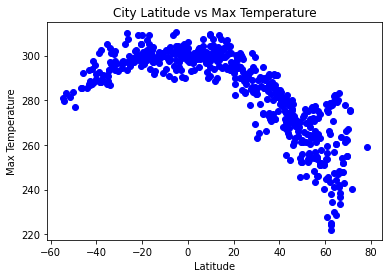

In [17]:
# Build scatter plot for latitude vs. temperature
x_column = 'Lat'  
y_column = 'Max Temp' 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df[x_column], city_data_df[y_column], color='blue', marker='o', label='City Max Latitude vs Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

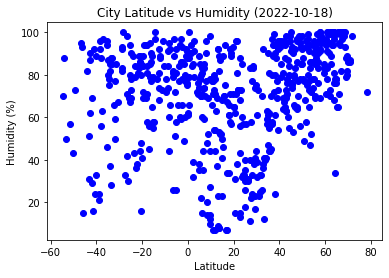

In [18]:
# Build the scatter plots for latitude vs. humidity
x_column = 'Lat'  
y_column = 'Humidity'

# Incorporate the other graph properties
plt.scatter(city_data_df[x_column], city_data_df[y_column], color='blue', marker='o', label='City Max Latitude vs Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

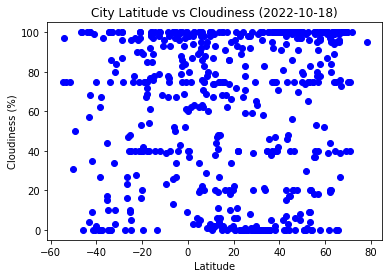

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_column = 'Lat'  
y_column = 'Cloudiness'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df[x_column], city_data_df[y_column], color='blue', marker='o', label='City Max Latitude vs Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

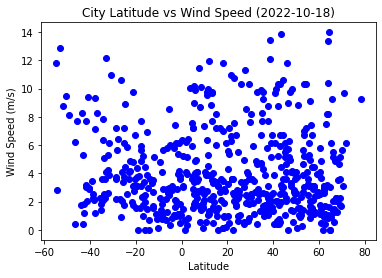

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_column = 'Lat'  
y_column = 'Wind Speed'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df[x_column], city_data_df[y_column], color='blue', marker='o', label='City Max Latitude vs Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values for plotting the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")  # Regression line in red

    # Annotate with the linear regression equation and non-squared R-value
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_text = f"R = {rvalue:.2f}"
    y_range = y_values.max() - y_values.min()  # Calculate the range of y_values
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    plt.annotate(r_text, (x_values.min(), y_values.max() - y_range * 0.1), fontsize=15, color="red")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

  
    # Show plot
    plt.show()






In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glace bay,46.1969,-59.9570,271.51,66,75,11.83,CA,1704820665
1,xifeng,42.7372,124.7222,255.46,98,15,1.76,CN,1704820667
2,bomdila,27.2500,92.4000,277.88,83,98,0.55,IN,1704820668
3,longyearbyen,78.2186,15.6401,259.06,72,95,9.26,SJ,1704820669
4,taoudenni,22.6783,-3.9836,300.19,15,98,2.64,ML,1704820671


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,rawson,-43.3002,-65.1023,293.58,31,4,8.26,AR,1704820546
6,uturoa,-16.7333,-151.4333,300.39,79,61,5.26,PF,1704820673
8,olinda,-8.0089,-34.8553,304.00,66,40,5.66,BR,1704820676
9,grytviken,-54.2811,-36.5092,279.78,88,97,2.79,GS,1704820677
10,loa janan,-0.5830,117.0950,297.87,91,98,0.51,ID,1704820679


###  Temperature vs. Latitude Linear Regression Plot

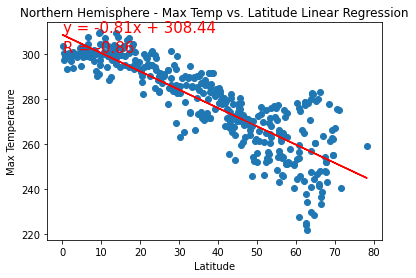

In [61]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

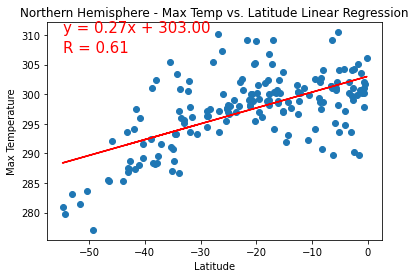

In [62]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
it seems like in northen hemisphere the max tempreture decreases as the lattitude increases evident by the negative linear relationship. This is vice versa for southern hemispehere

### Humidity vs. Latitude Linear Regression Plot

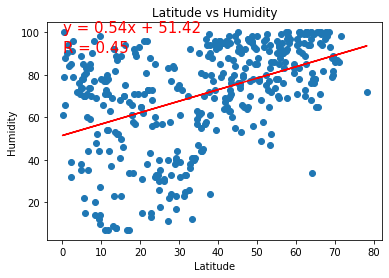

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', 'Latitude vs Humidity')

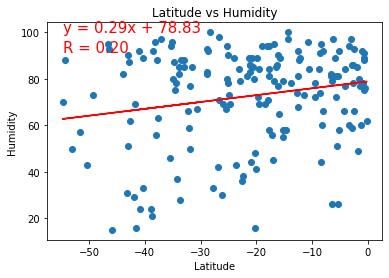

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', 'Latitude vs Humidity')

**Discussion about the linear relationship:** southern hemispehre witnesess a increasing humidity as latitude decrease evident by the positve x^2 but its come to notice the low r value meaning this data isnt very correlated. While the northern hemisphere indicate that as latitude increases humidity increases, although same with southern data the r value is quite low meaning low correlation.

### Cloudiness vs. Latitude Linear Regression Plot

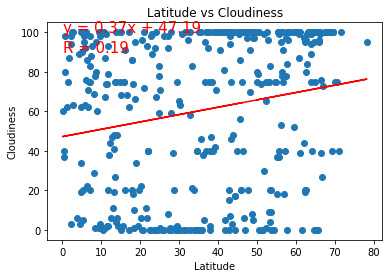

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', 'Latitude vs Cloudiness')

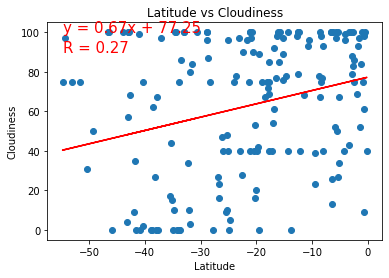

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', 'Latitude vs Cloudiness')

**Discussion about the linear relationship:** the low r value in these graphs mean that there isnt a significant correlation between latitiude and cloud cover

### Wind Speed vs. Latitude Linear Regression Plot

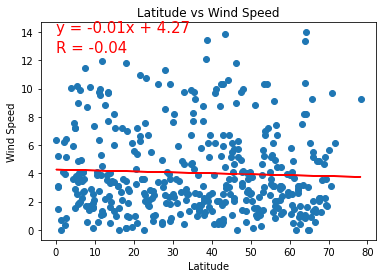

In [70]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

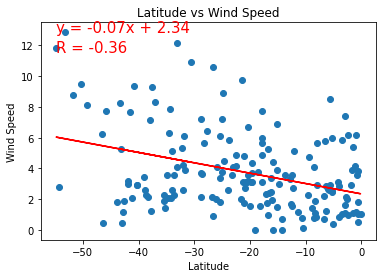

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', 'Latitude vs Wind Speed')

**Discussion about the linear relationship:** low r value means theres no correlation between the two premises